In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.vq import vq, kmeans, kmeans2, whiten

%matplotlib inline

In [2]:
def convert_to_float(value):
    """
    Transforms argument value to float;
    Replaces the comma in a string variable with a dot and rounds the value to two decimal places;
    
    Parameters
    --------
    value: float
    
    Returns
    --------
    float
    
    """
    value = float(str(value).replace(",", "."))
    value = round(value, 2)
    return value

#######################################################################################################################

### Подготовка данных

In [4]:
# Загрузка датафрейма из CSV файла;
textiles = pd.read_csv('../output/textiles_cleared.csv')

# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)
textiles['warp_thick_mean'] = textiles.warp_thick_mean.apply(convert_to_float)
textiles['weft_mean'] = textiles.weft_mean.apply(convert_to_float)
textiles['warp_dens'] = textiles.warp_dens.apply(convert_to_float)
textiles['weft_dens'] = textiles.weft_dens.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

In [10]:
print(len(textiles))

244


### Кластеризация методом k-средних

In [7]:
warp_thick = textiles['warp_thick_mean'].copy(deep=True)
weft_thick = textiles['weft_mean'].copy(deep=True)
warp_nominal = textiles['warp_nominal'].copy(deep=True)
weft_nominal = textiles['weft_nominal'].copy(deep=True)

In [9]:
# Получение нормальзованных значений параметров для кластеризации;
threads_whitened = whiten(list(zip(warp_thick, weft_thick, warp_nominal, weft_nominal)))

# получаем список с параметрами нитей;
threads = list(zip(textiles['warp_dens'].tolist(), textiles['weft_dens'].tolist(), textiles['warp_nominal'].tolist(), textiles['weft_nominal'].tolist()))

# получаем центроиды и метки кластеров;
threads_centroids, threads_labels = kmeans2(threads_whitened, 3, iter=10)

textiles['threads_labels'] = threads_labels

LinAlgError: Matrix is not positive definite

In [73]:
cluster_1 = textiles[textiles['threads_labels'] == 0]
cluster_2 = textiles[textiles['threads_labels'] == 1]
cluster_3 = textiles[textiles['threads_labels'] == 2]

In [74]:
cluster_1.to_csv('../output/clusters/cluster_1.csv')
cluster_2.to_csv('../output/clusters/cluster_2.csv')
cluster_3.to_csv('../output/clusters/cluster_3.csv')

In [77]:
cluster_1 = pd.read_csv('../output/clusters/dist/cluster_1.csv')
cluster_2 = pd.read_csv('../output/clusters/dist/cluster_2.csv')
cluster_3 = pd.read_csv('../output/clusters/dist/cluster_3.csv')

### Размер полученных кластеров

In [68]:
cluster_one = {}
cluster_one['n_bands'] = cluster_1.query('type == "n_band"')
cluster_one['m_bands'] = cluster_1.query('type == "m_band"')
cluster_one['w_bands'] = cluster_1.query('type == "w_band"')
cluster_one['funeral_shrouds'] = cluster_1.query('type == "funeral_shroud"')

cluster_two = {}
cluster_two['n_bands'] = cluster_2.query('type == "n_band"')
cluster_two['m_bands'] = cluster_2.query('type == "m_band"')
cluster_two['w_bands'] = cluster_2.query('type == "w_band"')
cluster_two['funeral_shrouds'] = cluster_2.query('type == "funeral_shroud"')

cluster_three = {}
cluster_three['n_bands'] = cluster_3.query('type == "n_band"')
cluster_three['m_bands'] = cluster_3.query('type == "m_band"')
cluster_three['w_bands'] = cluster_3.query('type == "w_band"')
cluster_three['funeral_shrouds'] = cluster_3.query('type == "funeral_shroud"')

In [135]:
cluster_one_stats = {}
cluster_two_stats = {}
cluster_three_stats = {}

cluster_one_stats['warp_dens_mean'] = round(cluster_1.warp_dens.mean(), 2)
cluster_one_stats['weft_dens_mean'] = round(cluster_1.weft_dens.mean(), 2)
cluster_one_stats['warp_mean'] = round(cluster_1.warp_nominal.mean(), 2)
cluster_one_stats['weft_mean'] = round(cluster_1.weft_nominal.mean(), 2)
cluster_one_stats['warp_dens_std'] = round(cluster_1.warp_dens.std(), 2)
cluster_one_stats['weft_dens_std'] = round(cluster_1.weft_dens.std(), 2)
cluster_one_stats['warp_nominal_std'] = round(cluster_1.warp_nominal.std(), 2)
cluster_one_stats['weft_nominal_std'] = round(cluster_1.weft_nominal.std(), 2)

cluster_two_stats['warp_dens_mean'] = round(cluster_2.warp_dens.mean(), 2)
cluster_two_stats['weft_dens_mean'] = round(cluster_2.weft_dens.mean(), 2)
cluster_two_stats['warp_mean'] = round(cluster_2.warp_nominal.mean(), 2)
cluster_two_stats['weft_mean'] = round(cluster_2.weft_nominal.mean(), 2)
cluster_two_stats['warp_dens_std'] = round(cluster_2.warp_dens.std(), 2)
cluster_two_stats['weft_dens_std'] = round(cluster_2.weft_dens.std(), 2)
cluster_two_stats['warp_nominal_std'] = round(cluster_2.warp_nominal.std(), 2)
cluster_two_stats['weft_nominal_std'] = round(cluster_2.weft_nominal.std(), 2)

cluster_three_stats['warp_dens_mean'] = round(cluster_3.warp_dens.mean(), 2)
cluster_three_stats['weft_dens_mean'] = round(cluster_3.weft_dens.mean(), 2)
cluster_three_stats['warp_mean'] = round(cluster_3.warp_nominal.mean(), 2)
cluster_three_stats['weft_mean'] = round(cluster_3.weft_nominal.mean(), 2)
cluster_three_stats['warp_dens_std'] = round(cluster_3.warp_dens.std(), 2)
cluster_three_stats['weft_dens_std'] = round(cluster_3.weft_dens.std(), 2)
cluster_three_stats['warp_nominal_std'] = round(cluster_3.warp_nominal.std(), 2)
cluster_three_stats['weft_nominal_std'] = round(cluster_3.weft_nominal.std(), 2)

In [138]:
print()
print("=========================")
print("В первом кластере содержится " + str(len(cluster_1))  + " тканей")
print("Во втором кластере содержится " + str(len(cluster_2)) + " тканей")
print("В третьем кластере содержится " + str(len(cluster_3)) + " тканей")
print()
print("=========================")
print("Узких бинтов в первом кластере - " + str(len(cluster_one['n_bands'])))
print("Средних бинтов в первом кластере - " + str(len(cluster_one['m_bands'])))
print("Широких бинтов в первом кластере - " + str(len(cluster_one['w_bands'])))
print("Погребальных пелен в первом кластере - " + str(len(cluster_one['funeral_shrouds'])))
print("Неклассифицированных тканей в первом кластере - " + str(len(cluster_1) -
                                                               len(cluster_one['n_bands']) -
                                                               len(cluster_one['m_bands']) -
                                                               len(cluster_one['w_bands']) -
                                                               len(cluster_one['funeral_shrouds'])
                                                              ))
print()
print("=========================")
print()
print("Узких бинтов в первом кластере - " + str(len(cluster_two['n_bands'])))
print("Средних бинтов во втором кластере - " + str(len(cluster_two['m_bands'])))
print("Широких бинтов во втором кластере - " + str(len(cluster_two['w_bands'])))
print("Погребальных пелен во втором кластере - " + str(len(cluster_two['funeral_shrouds'])))
print("Неклассифицированных тканей во втором кластере - " + str(len(cluster_2) -
                                                                len(cluster_two['n_bands']) -
                                                                len(cluster_two['m_bands']) -
                                                                len(cluster_two['w_bands']) -
                                                                len(cluster_two['funeral_shrouds'])
                                                               ))
print()
print("=========================")
print()
print("Узких бинтов в третьем кластере - " + str(len(cluster_three['n_bands'])))
print("Средних бинтов в третьем кластере - " + str(len(cluster_three['m_bands'])))
print("Широких бинтов в третьем кластере - " + str(len(cluster_three['w_bands'])))
print("Погребальных пелен в третьем кластере - " + str(len(cluster_three['funeral_shrouds'])))
print("Неклассифицированных тканей в третьем кластере - " + str(len(cluster_3) -
                                                                len(cluster_three['n_bands']) -
                                                                len(cluster_three['m_bands']) -
                                                                len(cluster_three['w_bands']) -
                                                                len(cluster_three['funeral_shrouds'])
                                                               ))
print()
print("=========================")
print("Кластер 1:")
print()
print("Средняя плотность по основе - " + str(cluster_one_stats['warp_dens_mean']))
print("Средняя плотность по утку - " + str(cluster_one_stats['weft_dens_mean']))
print("Средняя толщина нитей основы - " + str(cluster_one_stats['warp_mean']))
print("Средняя толщина нитей утка - " + str(cluster_one_stats['weft_mean']))
print("Сдандартное отклонение плотности по основе - " + str(cluster_one_stats['warp_dens_std']))
print("Стандартное отклонение плотности по утку - " + str(cluster_one_stats['weft_dens_std']))
print("Стандартное отклонение толщины нити по основе - " + str(cluster_one_stats['warp_nominal_std']))
print("Стандартное отклонение толщины нити по утку - " + str(cluster_one_stats['weft_nominal_std']))
print()
print("=========================")
print("Кластер 2:")
print("")
print("Средняя плотность по основе - " + str(cluster_two_stats['warp_dens_mean']))
print("Средняя плотность по утку - " + str(cluster_two_stats['weft_dens_mean']))
print("Средняя толщина нитей основы - " + str(cluster_two_stats['warp_mean']))
print("Средняя толщина нитей утка - " + str(cluster_two_stats['weft_mean']))
print("Сдандартное отклонение плотности по основе - " + str(cluster_two_stats['warp_dens_std']))
print("Стандартное отклонение плотности по утку - " + str(cluster_two_stats['weft_dens_std']))
print("Стандартное отклонение толщины нити по основе - " + str(cluster_two_stats['warp_nominal_std']))
print("Стандартное отклонение толщины нити по утку - " + str(cluster_two_stats['weft_nominal_std']))
print("")
print("=========================")
print("Кластер 3:")
print()
print("Средняя плотность по основе - " + str(cluster_three_stats['warp_dens_mean']))
print("Средняя плотность по утку - " + str(cluster_three_stats['weft_dens_mean']))
print("Средняя толщина нитей основы - " + str(cluster_three_stats['warp_mean']))
print("Средняя толщина нитей утка - " + str(cluster_three_stats['weft_mean']))
print("Сдандартное отклонение плотности по основе - " + str(cluster_three_stats['warp_dens_std']))
print("Стандартное отклонение плотности по утку - " + str(cluster_three_stats['weft_dens_std']))
print("Стандартное отклонение толщины нити по основе - " + str(cluster_three_stats['warp_nominal_std']))
print("Стандартное отклонение толщины нити по утку - " + str(cluster_three_stats['weft_nominal_std']))
print()
print("=========================")


В первом кластере содержится 165 тканей
Во втором кластере содержится 89 тканей
В третьем кластере содержится 49 тканей

Узких бинтов в первом кластере - 52
Средних бинтов в первом кластере - 43
Широких бинтов в первом кластере - 10
Погребальных пелен в первом кластере - 17
Неклассифицированных тканей в первом кластере - 43


Узких бинтов в первом кластере - 27
Средних бинтов во втором кластере - 23
Широких бинтов во втором кластере - 9
Погребальных пелен во втором кластере - 7
Неклассифицированных тканей во втором кластере - 23


Узких бинтов в третьем кластере - 15
Средних бинтов в третьем кластере - 15
Широких бинтов в третьем кластере - 0
Погребальных пелен в третьем кластере - 3
Неклассифицированных тканей в третьем кластере - 16

Кластер 1:

Средняя плотность по основе - 20.19
Средняя плотность по утку - 9.71
Средняя толщина нитей основы - 0.48
Средняя толщина нитей утка - 0.51
Сдандартное отклонение плотности по основе - 7.48
Стандартное отклонение плотности по утку - 2.6
Станд

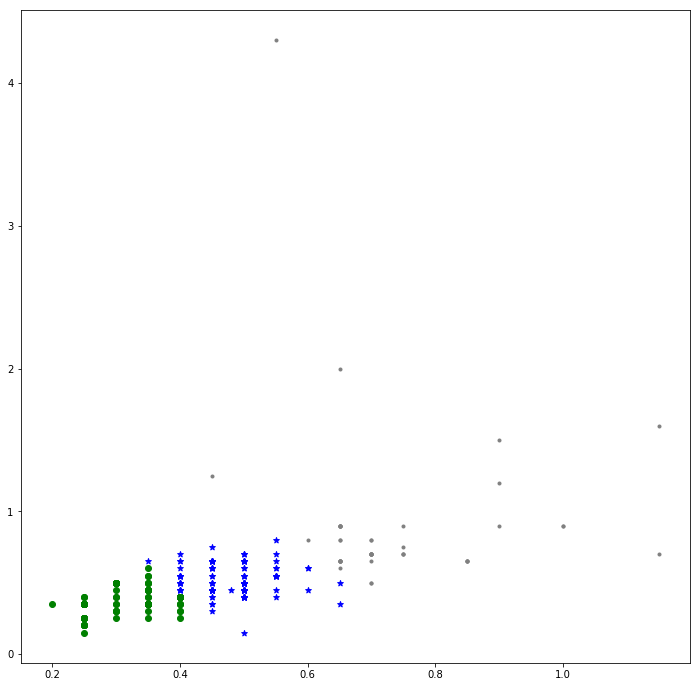

In [122]:
fig, ax = plt.subplots(figsize=(12, 12))


# ax.scatter(threads_centroids[0][0], threads_centroids[0][1], color='red')
# ax.scatter(threads_centroids[1][0], threads_centroids[1][1], color='red')
# ax.scatter(threads_centroids[2][0], threads_centroids[2][1], color='red')

ax.scatter(cluster_1['warp_nominal'].tolist(), cluster_1['weft_nominal'].tolist(), marker='*', color='blue')
ax.scatter(cluster_2['warp_nominal'].tolist(), cluster_2['weft_nominal'].tolist(), marker='o', color='green')
ax.scatter(cluster_3['warp_nominal'].tolist(), cluster_3['weft_nominal'].tolist(), marker='.', color='gray')

plt.show()

В целом, можно сказать, что выборка достаточно хорошо разделяется на три кластера (с учётом выбросов) по качеству  
Сами кластеры, при этом, ткани более или менее равномерно распределены вне зависимости от типа самой ткани/изделия,  
кроме кластера №3, который содержит большую часть потенциальных выбросов в выборке  
Ткани всех типов сравнительно равномерно представлены в кластерах №1 и №2 - таким образом, можно сказать, что, в  
основном, на бинты и пелены шли ткани примерно одинакового качества